In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  GenerationCurrent  Impedance  \
0  2019-01-08    23      36    2          240                1.3        0.0   
1  2019-01-08    23      44   49          238                1.2        0.0   
2  2019-01-08    23      45   49          238                1.2        0.0   
3  2019-01-08    23      46   49          239                1.2        0.0   
4  2019-01-08    23      47   49          238                1.2        0.0   

   GridCurrent  PowerFactor  GridImportEnergy  GridExportEnergy  \
0          1.3         0.98               0.1               0.0   
1          1.2         0.98               0.1               0.0   
2          1.2         0.98               0.1               0.0   
3          1.2         0.98               0.1               0.0   
4          1.2         0.98               0.1               0.0   

   GenerationImportEnergy  GenerationExportEnergy  Id  
0                     0.1                     0.0  96  
1                     0.1                     0.0  96  
2                     0.1                     0.0  96  
3                     0.1                     0.0  96  
4                     0.1                     0.0  96

In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

Date  Hour  Minute  Sec  GridVoltage  Id
0  2019-01-08    23      36    2          240  96
1  2019-01-08    23      44   49          238  96
2  2019-01-08    23      45   49          238  96
3  2019-01-08    23      46   49          239  96
4  2019-01-08    23      47   49          238  96

In [7]:
weekday_data1 =  data[data['Date'] >= '2019-02-24']
weekday_data2 = data[data['Date'] <= '2019-02-26']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

Id        Date  Hour  Minute   Sec  GridVoltage
0   4  2019-02-24     0       0  36.0        244.0
1   4  2019-02-24     0       1  37.0        243.0
2   4  2019-02-24     0       2  37.0        244.0
3   4  2019-02-24     0       3  37.0        244.0
4   4  2019-02-24     0       4  37.0        244.0

In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()
for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):
                rows1 = temp2[temp2['Minute'] < (j + 1) * 10] 
                rows2 = temp2[temp2['Minute'] >= j * 10]
                rows = pd.merge (rows1,rows2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
    #             print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segement':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [13]:
ten_minutes.head()

GridVoltage Id  Segement Segment
0        243.9  4       0.0     NaN
1        243.3  4       1.0     NaN
2        244.0  4       2.0     NaN
3        245.0  4       3.0     NaN
4        244.9  4       4.0     NaN

In [14]:
ten_minutes.shape

(15984, 4)

In [15]:
ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [16]:
ten_minutes.head()

GridVoltage Id  Segement
0        243.9  4       0.0
1        243.3  4       1.0
2        244.0  4       2.0
3        245.0  4       3.0
4        244.9  4       4.0

In [17]:
# 填充空值
ten_minutes = ten_minutes.fillna(ten_minutes.mean())
ten_minutes.head()

GridVoltage  Id  Segement
0        243.9   4       0.0
1        243.3   4       1.0
2        244.0   4       2.0
3        245.0   4       3.0
4        244.9   4       4.0

In [18]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

In [19]:
data_ten_minutes.head()

Id           0           1      2           3           4         5      6  \
0   4  243.900000  243.300000  244.0  245.000000  244.900000  244.7000  245.0   
1   5  245.500000  246.222222  245.3  245.166667  247.500000  244.9375  243.3   
2   8  242.166667  242.277778  244.0  243.333333  243.333333  244.5625  244.4   
3  10  234.700000  233.500000  239.5  237.500000  235.900000  238.5000  241.9   
4  12  234.900000  233.055556  239.4  237.555556  236.400000  238.4000  241.2   

          7           8  ...         422         423     424    425    426  \
0  244.4000  244.600000  ...  243.333333  242.333333  243.75  245.0  244.5   
1  241.8125  243.450000  ...  243.000000  243.400000  246.30  246.7  246.3   
2  244.1000  244.000000  ...  242.100000  241.800000  243.00  243.4  243.0   
3  242.2000  241.400000  ...  242.900000  243.000000  241.70  241.6  241.3   
4  241.2000  240.944444  ...  242.800000  243.300000  242.00  242.3  241.8   

     427    428    429         430    431  
0  244.5  244.0  244.0  241.969277  244.0  
1  245.7  245.6  245.7  247.600000  245.0  
2  243.1  243.5  243.6  243.100000  243.1  
3  241.3  240.5  240.9  242.200000  242.6  
4  240.8  240.6  241.4  242.100000  242.7  

[5 rows x 433 columns]

In [20]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [21]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [22]:
tranpose_ten.columns = id_list

In [23]:
tranpose_ten

4        5        8        10       12       15       16       17   \
0      243.9    245.5  242.167    234.7    234.9  244.222    244.4    245.1   
1      243.3  246.222  242.278    233.5  233.056      244      245    245.4   
2        244    245.3      244    239.5    239.4    244.7    244.5  244.556   
3        245  245.167  243.333    237.5  237.556      245    244.5    245.8   
4      244.9    247.5  243.333    235.9    236.4      245    247.1    247.3   
5      244.7  244.938  244.562    238.5    238.4   245.25    245.5    245.6   
6        245    243.3    244.4    241.9    241.2    245.6    243.9    244.8   
7      244.4  241.812    244.1    242.2    241.2      245    242.4    243.5   
8      244.6   243.45      244    241.4  240.944   244.45    243.5    244.5   
9      244.6  244.889  244.222    241.9    241.2  244.778    245.2    246.1   
10     245.4    247.6      243    240.3    239.3    245.1    247.5    247.8   
11       246    245.2      243    240.1    240.1    245.5    245.8    246.2   
12   246.333  245.889      243  242.056  241.889  246.125    246.8      247   
13     246.4    245.9    242.6    239.9    240.6    245.8    246.5      247   
14       246    245.3    243.3    239.2    240.1    245.5    245.9    246.5   
15   246.167  245.125  243.062    240.7  240.889  245.188    245.3      246   
16     246.7    246.9    243.4    240.7    241.4      246    247.3    247.6   
17     245.2    244.3   243.75    239.3    239.1    245.4    244.9    245.1   
18       245  245.556  243.643    239.7    240.3  244.556    245.9      246   
19       245  244.722    243.6    240.2  240.333  244.778    245.3    245.8   
20       245    247.3  241.969    240.1    240.9    244.6    247.4    247.8   
21     244.8  247.688  241.969    238.6    240.1   244.75    248.1      248   
22       245  245.438  241.969    238.2  238.722      245    245.9    245.7   
23   244.667  245.222  241.969    238.6  237.889  244.444      245    244.8   
24   244.667    246.5  241.969  237.889  237.889  244.333    246.8    246.6   
25     243.7  246.833  241.969    237.7    238.1  243.222    246.3    246.5   
26   243.167  245.222  241.969    238.9  239.667  242.833    245.8    246.2   
27     243.5    244.8  241.969    239.3    239.7    243.1    245.2    245.5   
28     243.1    244.5  241.969    240.7    239.9    242.8    244.7    245.4   
29     242.4    244.1  241.969    240.7    240.2    242.8    244.5    245.3   
..       ...      ...      ...      ...      ...      ...      ...      ...   
402      242    242.1    240.6    239.1    238.9      242    241.4    242.5   
403      241    241.5      240    238.6    238.8    241.7    240.6      242   
404    241.5    242.2    240.4    239.7      239      242    241.8      242   
405      241    242.4    241.2    241.4    240.6    241.7    242.5    242.5   
406  240.667    242.8    241.1    240.9    239.8    241.4    242.5    242.9   
407   239.25    244.1    240.5    239.1    238.3    241.2    243.7      244   
408      245    245.5    243.5  239.222  238.062  243.875    245.4    245.4   
409      244  245.833    243.3    239.5    239.2      245    245.5    245.4   
410      244    245.6      243    240.9    240.3    244.9    245.5    245.4   
411   242.75    245.4    242.7    241.4    240.8    243.5    245.2    245.3   
412    242.6  244.167    242.4    242.3      242  243.111    243.2    243.9   
413      242  245.625    242.1    241.1    240.4   242.75    244.4    245.2   
414    244.5   241.35    244.4    242.7    241.5   245.25    240.5    242.6   
415      245    243.2      244    242.2    241.4      245    241.8    243.6   
416      245  242.556    243.9    242.1    242.4  245.111      241    243.2   
417      245   244.25    242.8    240.7    240.4  244.667    243.3    244.7   
418      245    242.7    241.7    239.3    238.7    244.8    242.8    243.3   
419    243.5  244.556    241.1    239.6    238.8  243.444    244.3    244.7   
420   243.75    244.3    241.2    239.7    240.1   243.35  

In [24]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

4           5           8           10          12          15   \
0    243.900000  245.500000  242.166667  234.700000  234.900000  244.222222   
1    243.300000  246.222222  242.277778  233.500000  233.055556  244.000000   
2    244.000000  245.300000  244.000000  239.500000  239.400000  244.700000   
3    245.000000  245.166667  243.333333  237.500000  237.555556  245.000000   
4    244.900000  247.500000  243.333333  235.900000  236.400000  245.000000   
5    244.700000  244.937500  244.562500  238.500000  238.400000  245.250000   
6    245.000000  243.300000  244.400000  241.900000  241.200000  245.600000   
7    244.400000  241.812500  244.100000  242.200000  241.200000  245.000000   
8    244.600000  243.450000  244.000000  241.400000  240.944444  244.450000   
9    244.600000  244.888889  244.222222  241.900000  241.200000  244.777778   
10   245.400000  247.600000  243.000000  240.300000  239.300000  245.100000   
11   246.000000  245.200000  243.000000  240.100000  240.100000  245.500000   
12   246.333333  245.888889  243.000000  242.055556  241.888889  246.125000   
13   246.400000  245.900000  242.600000  239.900000  240.600000  245.800000   
14   246.000000  245.300000  243.300000  239.200000  240.100000  245.500000   
15   246.166667  245.125000  243.062500  240.700000  240.888889  245.187500   
16   246.700000  246.900000  243.400000  240.700000  241.400000  246.000000   
17   245.200000  244.300000  243.750000  239.300000  239.100000  245.400000   
18   245.000000  245.555556  243.642857  239.700000  240.300000  244.555556   
19   245.000000  244.722222  243.600000  240.200000  240.333333  244.777778   
20   245.000000  247.300000  241.969277  240.100000  240.900000  244.600000   
21   244.800000  247.687500  241.969277  238.600000  240.100000  244.750000   
22   245.000000  245.437500  241.969277  238.200000  238.722222  245.000000   
23   244.666667  245.222222  241.969277  238.600000  237.888889  244.444444   
24   244.666667  246.500000  241.969277  237.888889  237.888889  244.333333   
25   243.700000  246.833333  241.969277  237.700000  238.100000  243.222222   
26   243.166667  245.222222  241.969277  238.900000  239.666667  242.833333   
27   243.500000  244.800000  241.969277  239.300000  239.700000  243.100000   
28   243.100000  244.500000  241.969277  240.700000  239.900000  242.800000   
29   242.400000  244.100000  241.969277  240.700000  240.200000  242.800000   
..          ...         ...         ...         ...         ...         ...   
402  242.000000  242.100000  240.600000  239.100000  238.900000  242.000000   
403  241.000000  241.500000  240.000000  238.600000  238.800000  241.700000   
404  241.500000  242.200000  240.400000  239.700000  239.000000  242.000000   
405  241.000000  242.400000  241.200000  241.400000  240.600000  241.700000   
406  240.666667  242.800000  241.100000  240.900000  239.800000  241.400000   
407  239.250000  244.100000  240.500000  239.100000  238.300000  241.200000   
408  245.000000  245.500000  243.500000  239.222222  238.062500  243.875000   
409  244.000000  245.833333  243.300000  239.500000  239.200000  245.000000   
410  244.000000  245.600000  243.000000  240.900000  240.300000  244.900000   
411  242.750000  245.400000  242.700000  241.400000  240.800000  243.500000   
412  242.600000  244.166667  242.400000  242.300000  242.000000  243.111111   
413  242.000000  245.625000  242.100000  241.100000  240.400000  242.750000   
414  244.500000  241.350000  244.400000  242.700000  241.500000  245.250000   
415  245.000000  243.200000  244.000000  242.200000  241.400000  245.000000   
416  245.000000  242.555556  243.900000  242.100000  242.400000  245.111111   
417  245.000000  244.250000  242.800000  240.700000  240.400000  244.666667   
418  245.000000  242.700000  241.700000  239.300000  238.700000  244.800000   
419  243.500000  244.555556  241.100000  239.600000  238.800000  243.444444   
420  243.750000  244.300000  241.200000  239.700000  240.10000

In [25]:
ten_corr = tranpose_ten.corr()
ten_corr

4         5         8         10        12        15        16   \
4    1.000000  0.454045  0.749538  0.568364  0.568262  0.924043  0.497633   
5    0.454045  1.000000  0.343611  0.150049  0.163998  0.495926  0.954271   
8    0.749538  0.343611  1.000000  0.778765  0.779840  0.812501  0.384955   
10   0.568364  0.150049  0.778765  1.000000  0.956032  0.581395  0.185795   
12   0.568262  0.163998  0.779840  0.956032  1.000000  0.570406  0.197470   
15   0.924043  0.495926  0.812501  0.581395  0.570406  1.000000  0.533270   
16   0.497633  0.954271  0.384955  0.185795  0.197470  0.533270  1.000000   
17   0.548846  0.928681  0.437409  0.206363  0.198161  0.595981  0.946064   
18   0.947824  0.460398  0.798017  0.601263  0.595748  0.957177  0.504534   
29   0.547034  0.950965  0.434629  0.208313  0.207673  0.592209  0.968314   
31   0.549256  0.134824  0.760572  0.939861  0.930457  0.545195  0.167166   
32   0.568451  0.171322  0.779645  0.926173  0.984158  0.572136  0.202710   
34  -0.031587  0.510946 -0.100221 -0.232996 -0.266058  0.045265  0.419990   
39   0.781030  0.266752  0.645111  0.462135  0.477401  0.845412  0.294741   
40   0.955500  0.487301  0.798088  0.590773  0.584167  0.967680  0.533366   
41   0.592495  0.552561  0.492710  0.474884  0.487571  0.705047  0.555359   
43   0.573912  0.177687  0.782075  0.943673  0.995574  0.575649  0.207242   
45   0.677472  0.273842  0.841208  0.907531  0.959048  0.687423  0.320941   
46   0.610041  0.238312  0.807776  0.911786  0.972797  0.619773  0.277455   
47   0.479832  0.088897  0.702525  0.899738  0.884698  0.466888  0.115977   
49   0.616730  0.540099  0.522886  0.494751  0.521449  0.716693  0.555930   
50   0.903193  0.433568  0.795159  0.561309  0.576736  0.971158  0.478213   
52   0.616458  0.087537  0.570302  0.476170  0.566904  0.666082  0.131312   
54   0.554481  0.935028  0.442282  0.205190  0.195901  0.605076  0.954291   
57   0.281991  0.844003  0.184229 -0.090993 -0.108704  0.341922  0.771422   
62   0.780855  0.375135  0.979782  0.785121  0.799064  0.832934  0.418484   
64   0.309606  0.859766  0.199189 -0.082293 -0.108980  0.367394  0.789056   
66   0.562648  0.183733  0.765065  0.910902  0.969711  0.563107  0.218611   
70   0.562464  0.168452  0.766813  0.947065  0.995307  0.564226  0.198614   
75   0.570471  0.171934  0.784653  0.945843  0.995912  0.575329  0.201577   
76   0.611518  0.513655  0.518502  0.500730  0.540411  0.701459  0.533872   
78   0.666255  0.265527  0.840540  0.917598  0.964095  0.682511  0.305889   
85   0.573339  0.189897  0.782760  0.937772  0.990373  0.577383  0.218873   
92   0.509666  0.951019  0.406832  0.194234  0.197536  0.553935  0.974575   
96   0.725612  0.205974  0.659013  0.537861  0.617889  0.777918  0.252172   
99   0.578918  0.184878  0.787409  0.928321  0.987981  0.580707  0.219338   
100  0.501489  0.100431  0.732776  0.914644  0.905111  0.495359  0.131892   

          17        18        29   ...       66        70        75   \
4    0.548846  0.947824  0.547034  ...  0.562648  0.562464  0.570471   
5    0.928681  0.460398  0.950965  ...  0.183733  0.168452  0.171934   
8    0.437409  0.798017  0.434629  ...  0.765065  0.766813  0.784653   
10   0.206363  0.601263  0.208313  ...  0.910902  0.947065  0.945843   
12   0.198161  0.595748  0.207673  ...  0.969711  0.995307  0.995912   
15   0.595981  0.957177  0.592209  ...  0.563107  0.564226  0.575329   
16   0.946064  0.504534  0.968314  ...  0.218611  0.198614  0.201577   
17   1.000000  0.566699  0.984167  ...  0.212295  0.197774  0.202429   
18   0.566699  1.000000  0.561058  ...  0.591660  0.589687  0.599096   
29   0.984167  0.561058  1.000000  ...  0.224087  0.207639  0.212812   
31   0.175770  0.583247  0.180075  ...  0.901682  0.919234  0.924199   
32   0.203626  0.597882  0.213769  ...  0.976427  0.983620  0.991951   
34   0.443915  0.015563  0.422184  ... -0.255944 -0.257080 -0.261903   
39   0.306138  0.810597  0.304304  ...  0.467343  0.470370  0.477882   
40 

# 层次聚类

In [26]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - np.abs(ten_corr)
hierarchy = linkage(squareform(dissimilarity), method='average')
labels_hie = fcluster(hierarchy, 0.48, criterion='distance')

In [27]:
dissimilarity

4         5         8         10        12        15        16   \
4    0.000000  0.545955  0.250462  0.431636  0.431738  0.075957  0.502367   
5    0.545955  0.000000  0.656389  0.849951  0.836002  0.504074  0.045729   
8    0.250462  0.656389  0.000000  0.221235  0.220160  0.187499  0.615045   
10   0.431636  0.849951  0.221235  0.000000  0.043968  0.418605  0.814205   
12   0.431738  0.836002  0.220160  0.043968  0.000000  0.429594  0.802530   
15   0.075957  0.504074  0.187499  0.418605  0.429594  0.000000  0.466730   
16   0.502367  0.045729  0.615045  0.814205  0.802530  0.466730  0.000000   
17   0.451154  0.071319  0.562591  0.793637  0.801839  0.404019  0.053936   
18   0.052176  0.539602  0.201983  0.398737  0.404252  0.042823  0.495466   
29   0.452966  0.049035  0.565371  0.791687  0.792327  0.407791  0.031686   
31   0.450744  0.865176  0.239428  0.060139  0.069543  0.454805  0.832834   
32   0.431549  0.828678  0.220355  0.073827  0.015842  0.427864  0.797290   
34   0.968413  0.489054  0.899779  0.767004  0.733942  0.954735  0.580010   
39   0.218970  0.733248  0.354889  0.537865  0.522599  0.154588  0.705259   
40   0.044500  0.512699  0.201912  0.409227  0.415833  0.032320  0.466634   
41   0.407505  0.447439  0.507290  0.525116  0.512429  0.294953  0.444641   
43   0.426088  0.822313  0.217925  0.056327  0.004426  0.424351  0.792758   
45   0.322528  0.726158  0.158792  0.092469  0.040952  0.312577  0.679059   
46   0.389959  0.761688  0.192224  0.088214  0.027203  0.380227  0.722545   
47   0.520168  0.911103  0.297475  0.100262  0.115302  0.533112  0.884023   
49   0.383270  0.459901  0.477114  0.505249  0.478551  0.283307  0.444070   
50   0.096807  0.566432  0.204841  0.438691  0.423264  0.028842  0.521787   
52   0.383542  0.912463  0.429698  0.523830  0.433096  0.333918  0.868688   
54   0.445519  0.064972  0.557718  0.794810  0.804099  0.394924  0.045709   
57   0.718009  0.155997  0.815771  0.909007  0.891296  0.658078  0.228578   
62   0.219145  0.624865  0.020218  0.214879  0.200936  0.167066  0.581516   
64   0.690394  0.140234  0.800811  0.917707  0.891020  0.632606  0.210944   
66   0.437352  0.816267  0.234935  0.089098  0.030289  0.436893  0.781389   
70   0.437536  0.831548  0.233187  0.052935  0.004693  0.435774  0.801386   
75   0.429529  0.828066  0.215347  0.054157  0.004088  0.424671  0.798423   
76   0.388482  0.486345  0.481498  0.499270  0.459589  0.298541  0.466128   
78   0.333745  0.734473  0.159460  0.082402  0.035905  0.317489  0.694111   
85   0.426661  0.810103  0.217240  0.062228  0.009627  0.422617  0.781127   
92   0.490334  0.048981  0.593168  0.805766  0.802464  0.446065  0.025425   
96   0.274388  0.794026  0.340987  0.462139  0.382111  0.222082  0.747828   
99   0.421082  0.815122  0.212591  0.071679  0.012019  0.419293  0.780662   
100  0.498511  0.899569  0.267224  0.085356  0.094889  0.504641  0.868108   

          17        18        29   ...       66        70        75   \
4    0.451154  0.052176  0.452966  ...  0.437352  0.437536  0.429529   
5    0.071319  0.539602  0.049035  ...  0.816267  0.831548  0.828066   
8    0.562591  0.201983  0.565371  ...  0.234935  0.233187  0.215347   
10   0.793637  0.398737  0.791687  ...  0.089098  0.052935  0.054157   
12   0.801839  0.404252  0.792327  ...  0.030289  0.004693  0.004088   
15   0.404019  0.042823  0.407791  ...  0.436893  0.435774  0.424671   
16   0.053936  0.495466  0.031686  ...  0.781389  0.801386  0.798423   
17   0.000000  0.433301  0.015833  ...  0.787705  0.802226  0.797571   
18   0.433301  0.000000  0.438942  ...  0.408340  0.410313  0.400904   
29   0.015833  0.438942  0.000000  ...  0.775913  0.792361  0.787188   
31   0.824230  0.416753  0.819925  ...  0.098318  0.080766  0.075801   
32   0.796374  0.402118  0.786231  ...  0.023573  0.016380  0.008049   
34   0.556085  0.984437  0.577816  ...  0.744056  0.742920  0.738097   
39   0.693862  0.189403  0.695696  ...  0.532657  0.529630  0.522118   
40 

In [28]:
labels_hie = labels_hie - 1
labels_hie

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [29]:
data_ten_minutes['labels_hiera'] = labels_hie

# kmeans

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [31]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [32]:
clinski_harabaz_scores

[67.39485211433427,
 105.0053146563523,
 95.2818043094421,
 100.41595955256123,
 119.4065251517574,
 140.15297571700052,
 204.59068596675692,
 284.78363594882546]

In [33]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [34]:
labels_kmeans

array([0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1])

In [35]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [37]:
meanShift = MeanShift(bandwidth=1.3)
labels_mean = meanShift.fit_predict(dissimilarity)

In [38]:
labels_mean

array([1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [39]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
labels_dbscan = DBSCAN(eps = 0.2).fit_predict(dissimilarity)

In [42]:
labels_dbscan

array([-1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  1,
       -1,  0, -1], dtype=int64)

In [43]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

In [44]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

Id           0           1           2           3           4  \
0     4  243.900000  243.300000  244.000000  245.000000  244.900000   
1     5  245.500000  246.222222  245.300000  245.166667  247.500000   
3    10  234.700000  233.500000  239.500000  237.500000  235.900000   
4    12  234.900000  233.055556  239.400000  237.555556  236.400000   
5    15  244.222222  244.000000  244.700000  245.000000  245.000000   
6    16  244.400000  245.000000  244.500000  244.500000  247.100000   
7    17  245.100000  245.400000  244.555556  245.800000  247.300000   
8    18  243.900000  243.300000  244.300000  245.000000  244.600000   
9    29  245.222222  245.777778  245.100000  246.000000  247.166667   
10   31  235.100000  231.900000  238.400000  236.000000  234.400000   
11   32  235.750000  233.833333  239.500000  237.888889  236.888889   
13   39  244.111111  244.055556  243.300000  244.222222  243.833333   
14   40  244.200000  243.800000  244.400000  245.000000  244.900000   
15   41  246.200000  245.111111  246.200000  247.300000  246.600000   
16   43  235.333333  233.722222  239.500000  237.722222  236.777778   
17   45  238.800000  237.444444  241.400000  240.400000  240.100000   
18   46  237.200000  235.300000  239.000000  237.500000  237.600000   
19   47  233.600000  230.000000  238.600000  236.300000  234.200000   
20   49  246.600000  245.200000  246.500000  247.500000  247.200000   
21   50  244.300000  244.000000  244.300000  245.100000  245.100000   
22   52  241.777778  241.000000  239.800000  242.400000  242.444444   
23   54  245.600000  245.800000  245.500000  246.000000  247.300000   
24   57  246.888889  247.375000  246.700000  246.600000  247.700000   
25   62  242.400000  242.700000  244.200000  243.900000  243.400000   
26   64  247.125000  248.000000  246.812500  246.687500  247.888889   
27   66  235.600000  232.400000  239.800000  237.100000  237.500000   
28   70  234.600000  232.900000  239.000000  237.200000  236.100000   
29   75  235.277778  233.777778  239.500000  237.800000  236.722222   
30   76  246.600000  245.200000  246.300000  247.500000  247.000000   
31   78  238.100000  237.100000  239.900000  238.900000  238.700000   
32   85  235.900000  233.944444  239.600000  237.700000  237.000000   
33   92  245.000000  245.600000  245.300000  245.500000  247.300000   
34   96  242.600000  242.000000  241.200000  243.800000  243.500000   
35   99  236.111111  234.200000  240.000000  238.300000  237.200000   
36  100  234.888889  232.277778  239.000000  236.800000  235.277778   

             5           6           7           8  ...    427         428  \
0   244.700000  245.000000  244.400000  244.600000  ...  244.5  244.000000   
1   244.937500  243.300000  241.812500  243.450000  ...  245.7  245.600000   
3   238.500000  241.900000  242.200000  241.400000  ...  241.3  240.500000   
4   238.400000  241.200000  241.200000  240.944444  ...  240.8  240.600000   
5   245.250000  245.600000  245.000000  244.450000  ...  245.0  245.000000   
6   245.500000  243.900000  242.400000  243.500000  ...  245.7  245.500000   
7   245.600000  244.800000  243.500000  244.500000  ...  245.7  244.500000   
8   244.600000  245.000000  244.400000  244.500000  ...  244.2  244.000000   
9   245.562500  244.666667  243.000000  244.600000  ...  245.6  245.400000   
10  238.200000  241.600000  242.500000  240.400000  ...  239.5  238.400000   
11  238.562500  241.100000  240.937500  240.900000  ...  240.8  241.400000   
13  244.500000  245.000000  243.555556  241.700000  ...  244.4  244.400000   
14  244.888889  245.000000  244.600000  244.500000  ...  244.8  244.500000   
15  243.100000  246.400000  245.400000  244.050000  ...  247.0  248.200000   
16  238.428571  240.900000  240.944444  240.900000  ...  240.7  241.300000   
17  241.222222  243.500000  242.700000  242.400000  ...  242.7  243.800000   
18  239.100000  241.300000  241.800000  241.900000  ...  241.6  242.300000   
19  237.400000  240.900000  241.900000  241.

#plot 原始图

In [45]:
import matplotlib.pyplot as plt

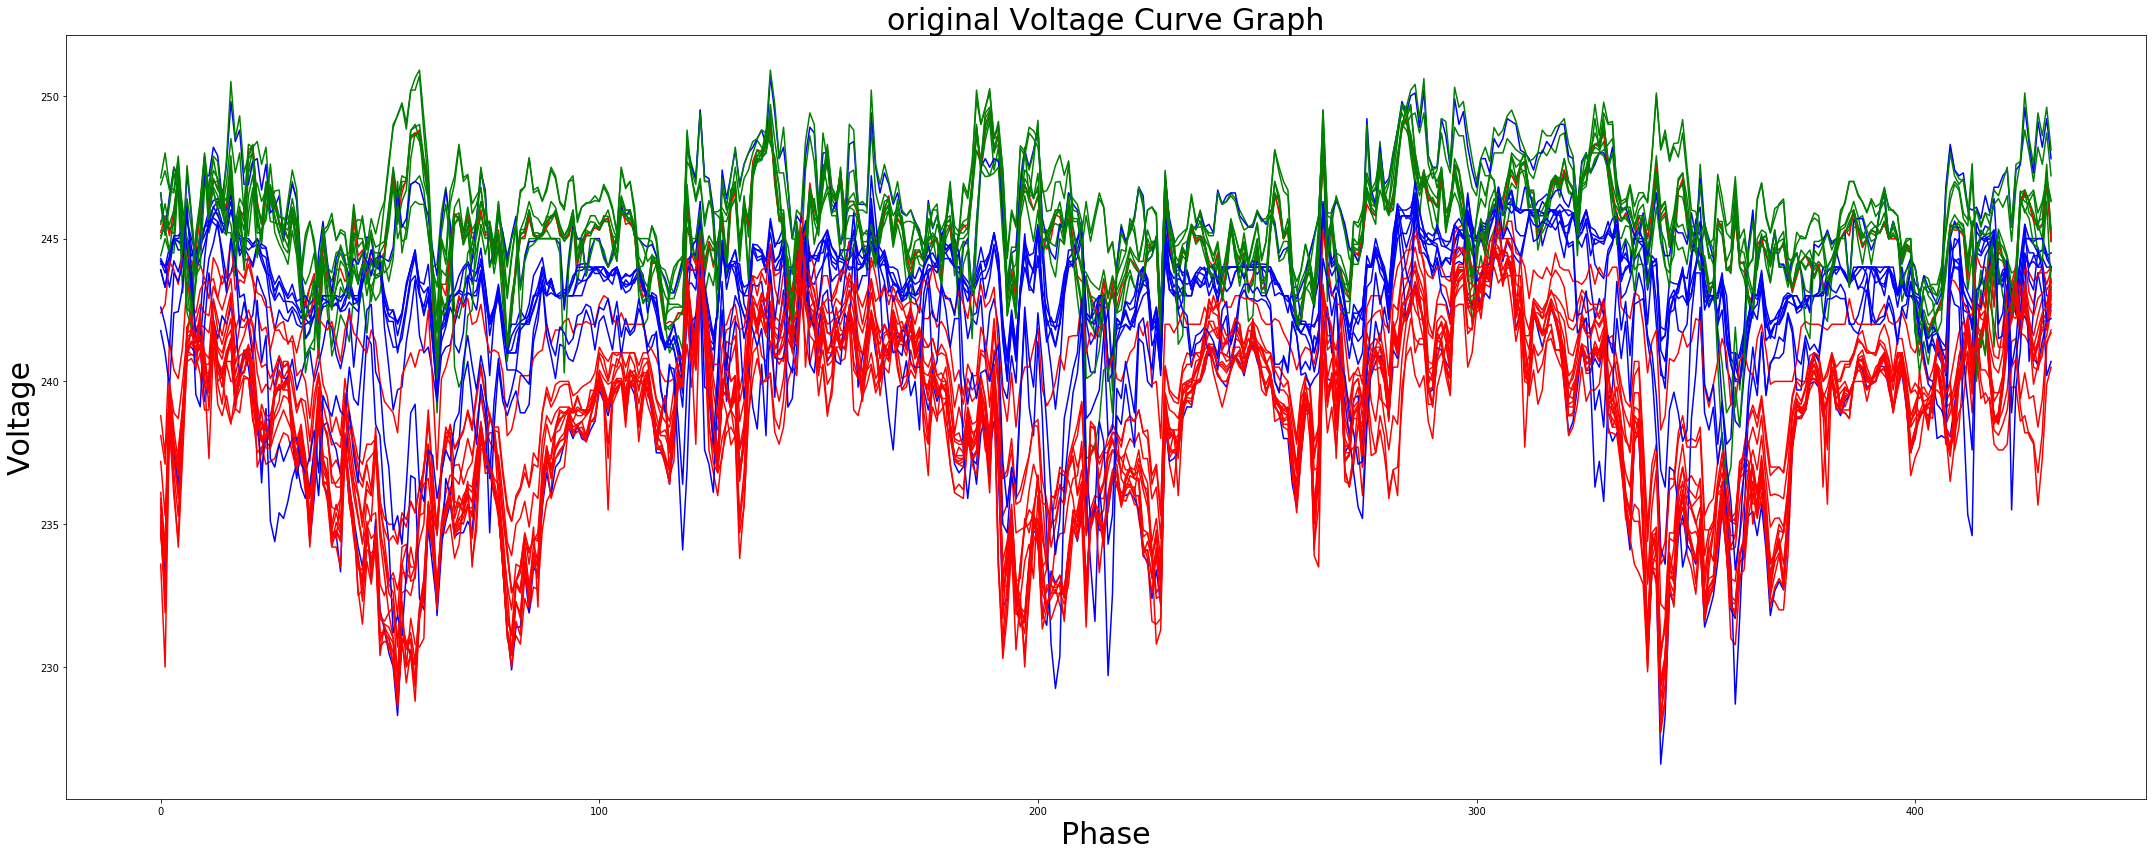

In [46]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('original Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

#plot 层次聚类label

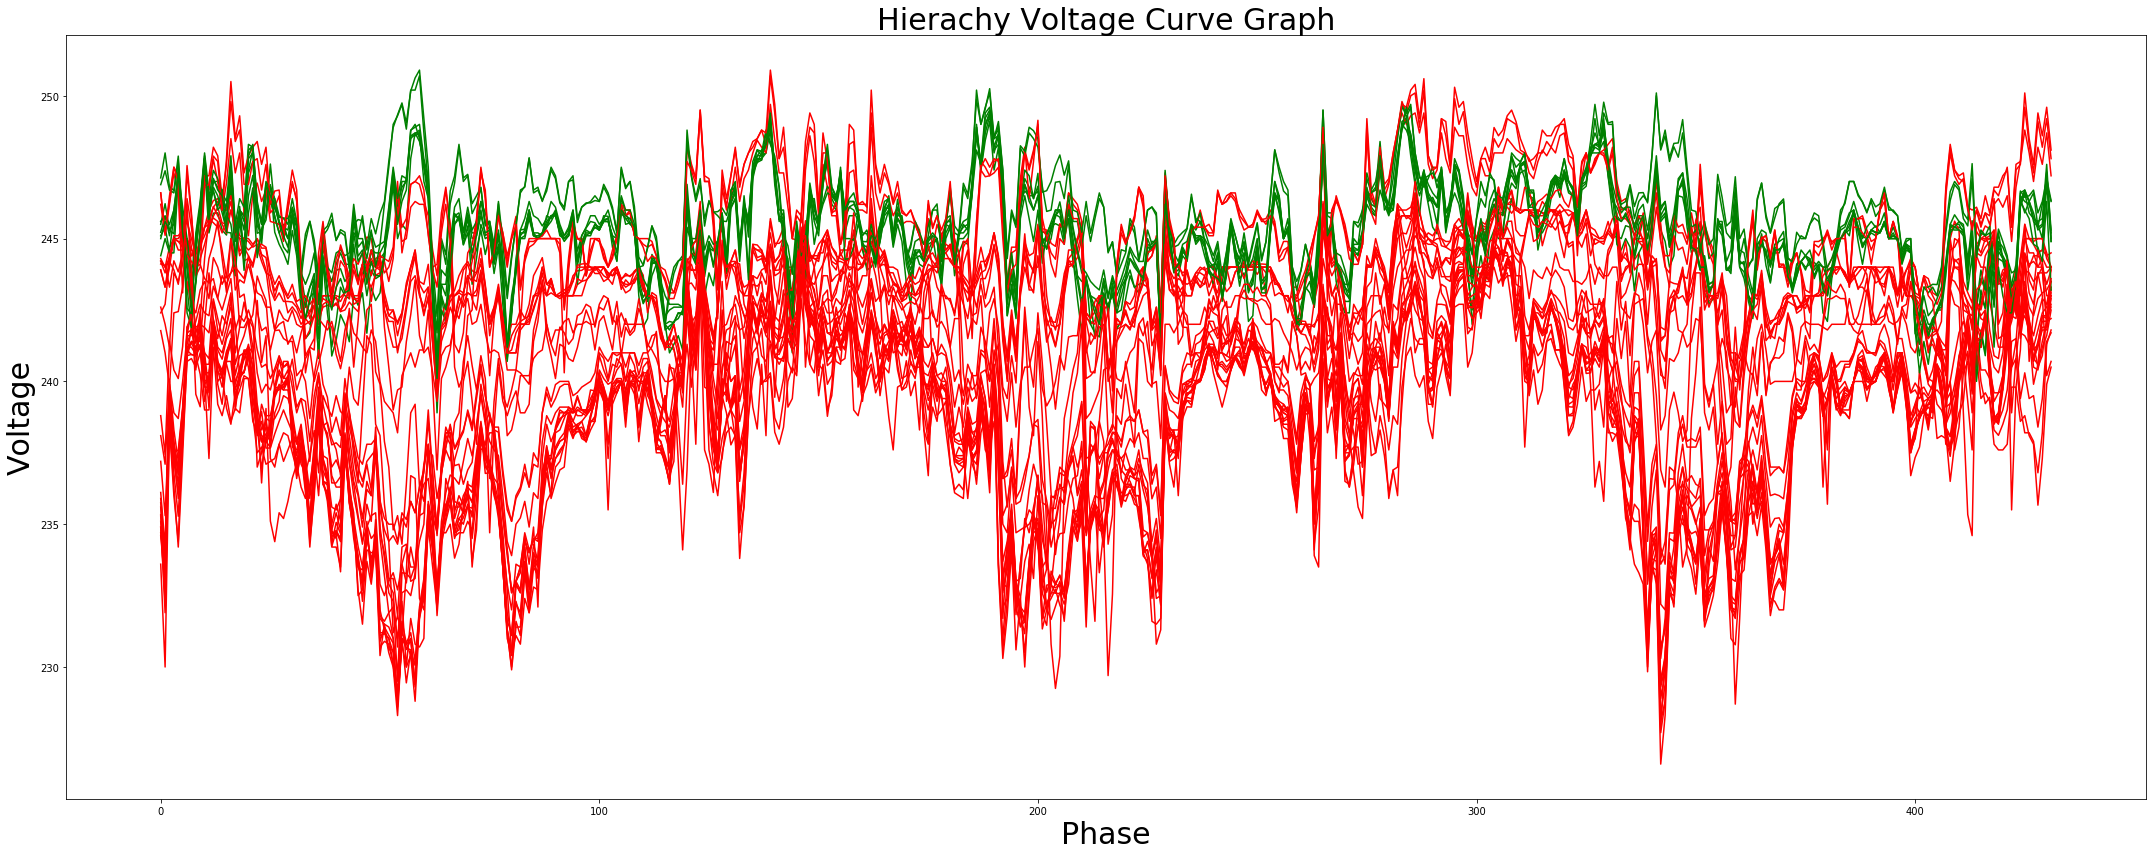

In [47]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_hiera'].values[0]
    if idx > 2:
        idx = 2 #聚类需要分析idx=3的一个特殊情况
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('Hierachy Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

#plot kmeans label

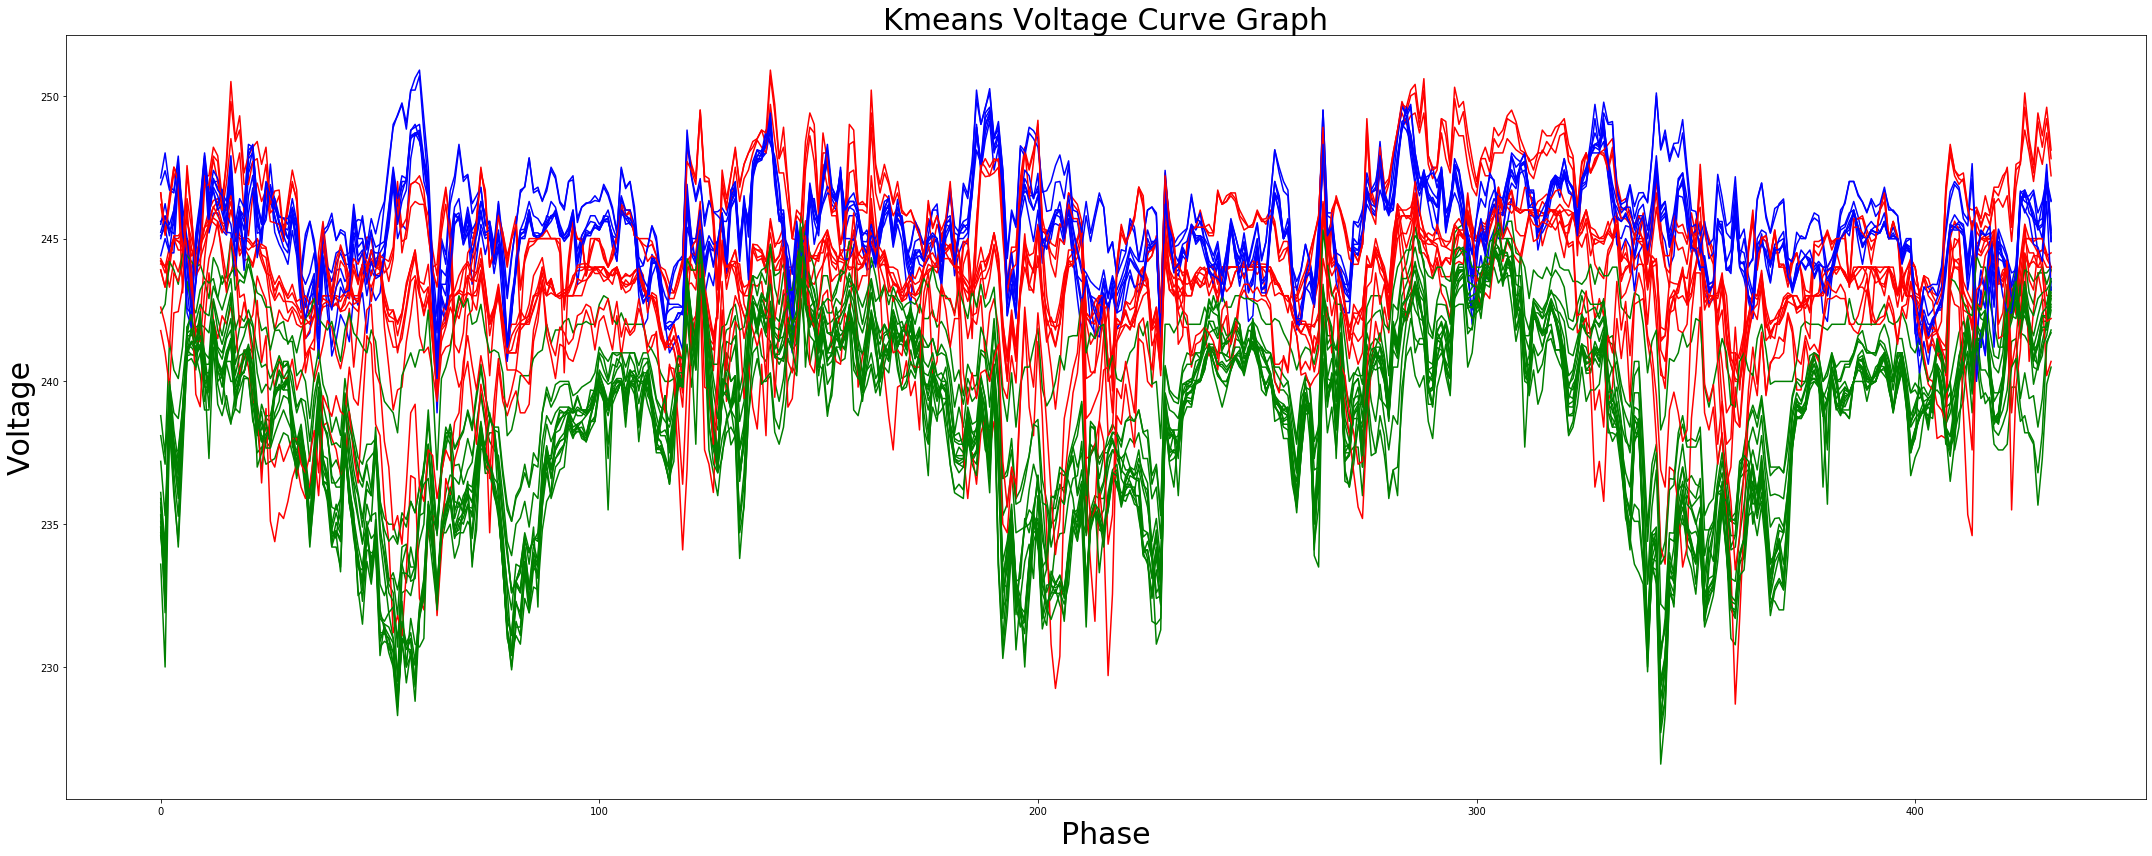

In [48]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('Kmeans Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# plot meanshift

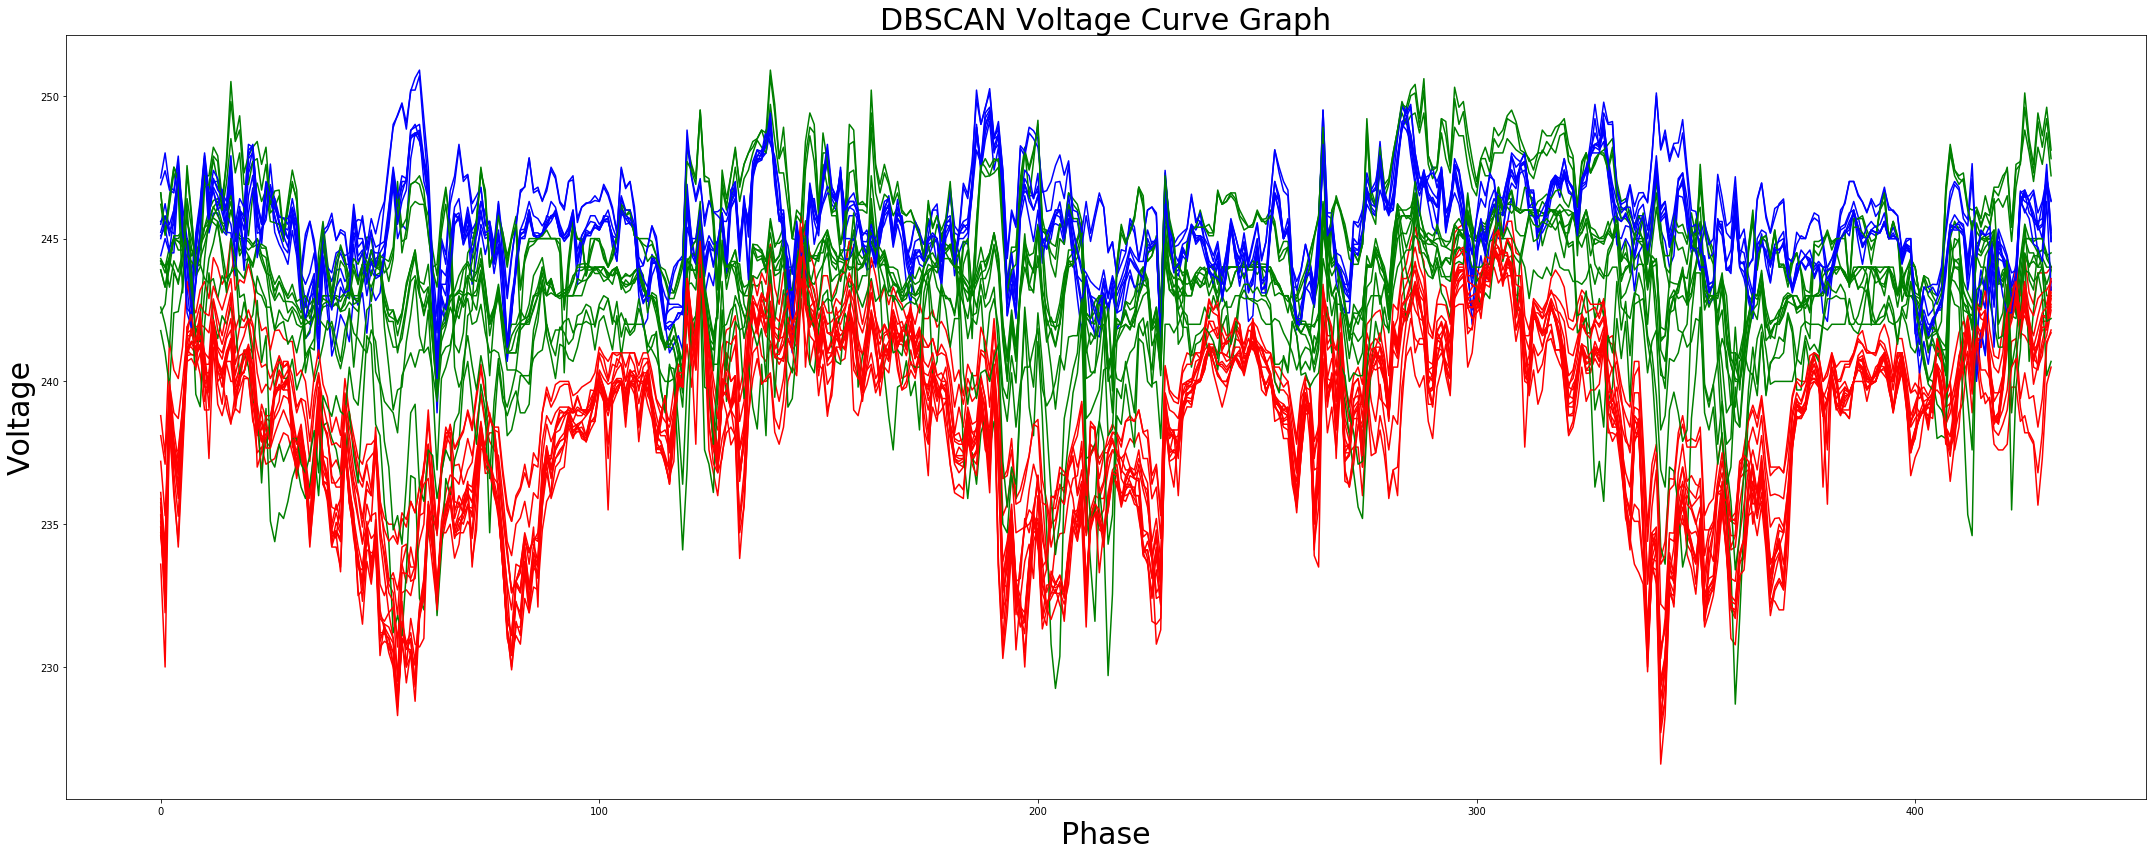

In [49]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('DBSCAN Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# plot DBSCAN

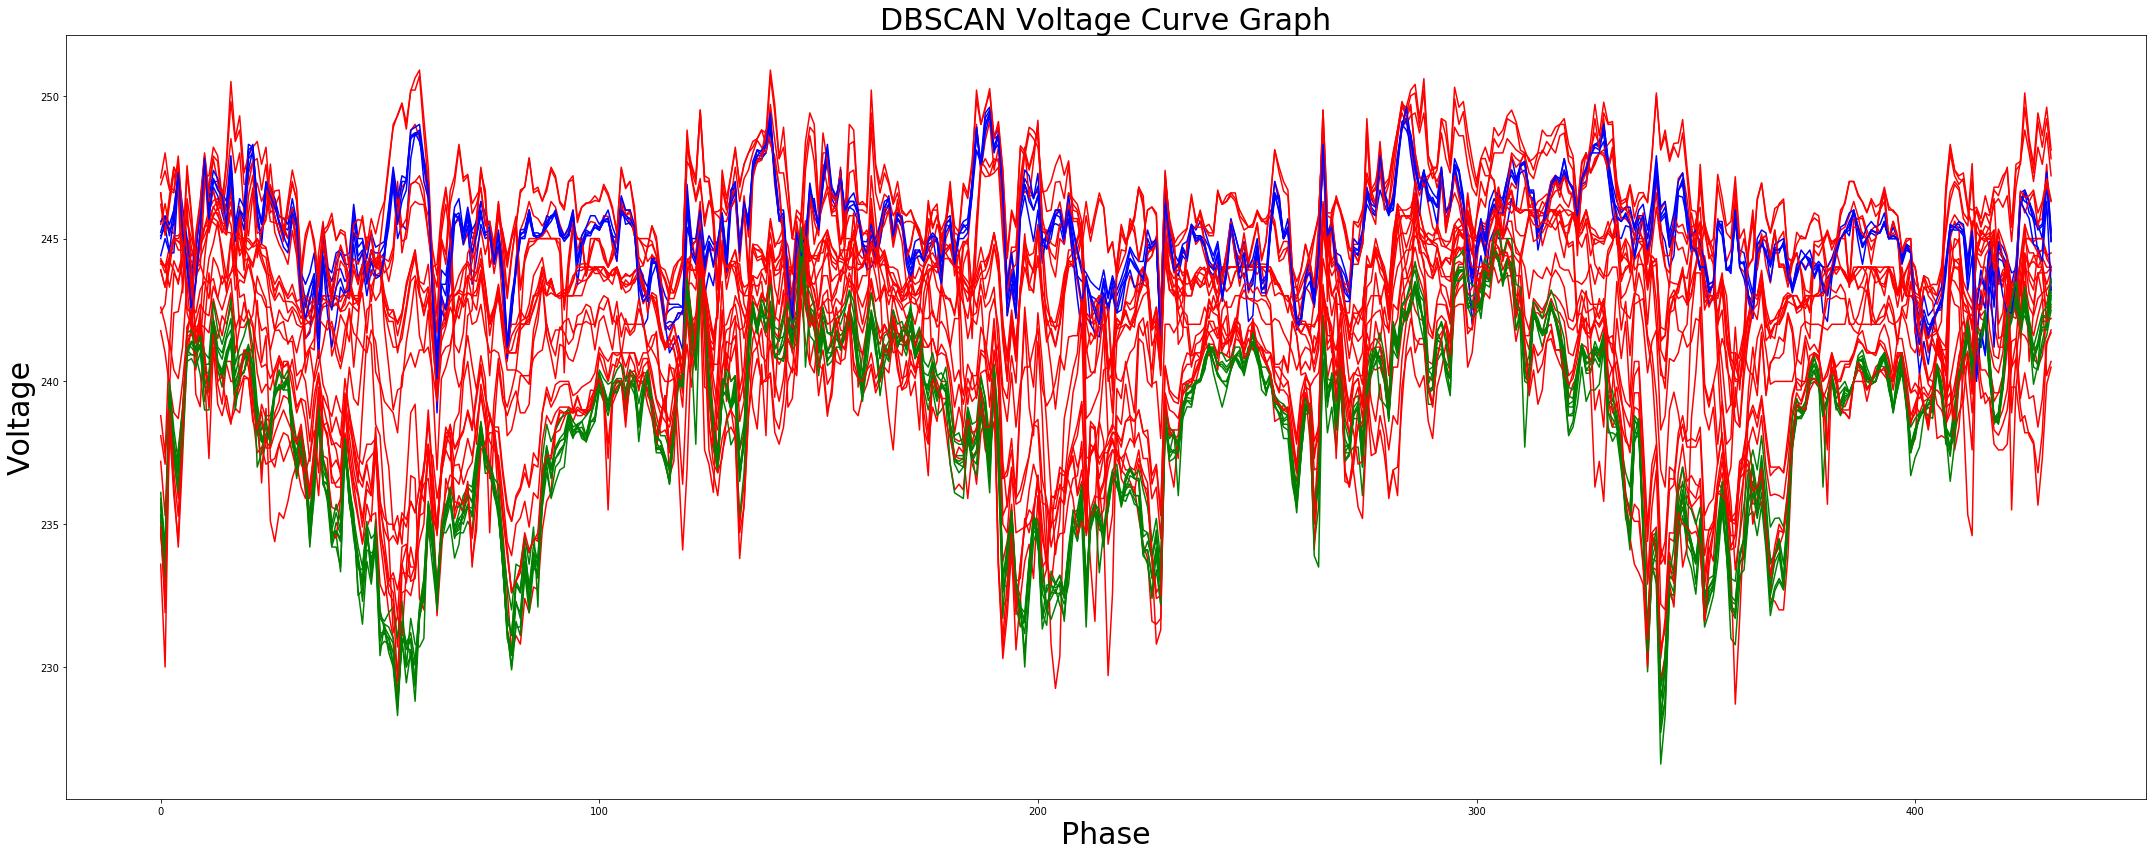

In [50]:
color_list = ['red','green','blue']
cluster_num = 3
x = range(432)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(432):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx])

plt.title('DBSCAN Voltage Curve Graph', fontsize = 30)
plt.xlabel('Phase', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# Confusion Matrix Kmeans

In [51]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

array([[ 0, 15,  1],
       [ 2,  0,  7],
       [ 9,  1,  0]], dtype=int64)

In [52]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0   1  2
Actual             
0          0  15  1
1          2   0  7
2          9   1  0

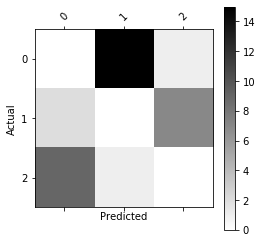

In [53]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

# Confusion Matrix Mean Shift

In [54]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted   0  1  2
Actual             
0          14  1  1
1           0  2  7
2           1  9  0

# Confusion Matrix DBSCAN

In [55]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted  0  1  2
Actual            
0          8  7  1
1          5  0  4
2          9  1  0